In [108]:
#Importo le librerie necessarie 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#Carico il dataset corretto

In [109]:
#Percorso file

percorso_del_file = "/Users/rossanotesi/Desktop/Prova_finale_Star2Impact/Dataset/Dataset_progetto_finale.csv"
dataset = pd.read_csv('/Users/rossanotesi/Desktop/Prova_finale_Star2Impact/Dataset/Dataset_progetto_finale.csv')

#Il dataset è memorizzato nella variabile 'dataset' e lo "read"


In [110]:
#Osservo i primi valori in testa 

dataset.head()

,cooking_date,user_uuid,category,chef_id,language,level,challenge_id,country,subscription_date,platform,recipe_id,stars
0,4-2-2023,82,smoothie,109,fr,intermediate,1,fr,21-1-2022,pc,1251,1
1,22-6-2023,123,ethnic,122,fr,advanced,3,fr,19-9-2021,mobile,6347,1
2,8-10-2021,186,smoothie,105,fr,basic,0,fr,12-8-2020,tv,1152,5
3,4-3-2021,202,ethnic,118,fr,basic,3,fr,4-2-2020,tv,6140,2
4,18-1-2022,216,lunch,103,en,intermediate,1,uk,8-10-2021,pc,6248,1


In [111]:
#Ci sono molti valori nulli? Cerchiamoli! 

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   cooking_date       999 non-null    object
 1   user_uuid          999 non-null    int64 
 2   category           999 non-null    object
 3   chef_id            999 non-null    int64 
 4   language           999 non-null    object
 5   level              999 non-null    object
 6   challenge_id       999 non-null    int64 
 7   country            999 non-null    object
 8   subscription_date  999 non-null    object
 9   platform           999 non-null    object
 10  recipe_id          999 non-null    int64 
 11  stars              999 non-null    int64 
dtypes: int64(5), object(7)
memory usage: 93.8+ KB


In [152]:
#Conto i valori univoci per categoria

num_category = dataset['category'].nunique()
num_chef_id = dataset['chef_id'].nunique()
num_user_uuid = dataset['user_uuid'].nunique()
num_country = dataset['country'].nunique()
num_platform = dataset['platform'].nunique()

print(f"Numero di categorie: {len(dataset['category'].unique())}, Categorie: {', '.join(dataset['category'].unique())}")
print(" ")
print(f"Numero di chef_id univoci: {num_chef_id}")
print(" ")
print(f"Numero di user_uuid univoci: {num_user_uuid}")
print(" ")
print(f"Numero di paesi univoci: {len(dataset['country'].unique())}, Paesi: {', '.join(dataset['country'].unique())}")
print(" ")
print(f"Numero di piattaforme univoche: {len(dataset['platform'].unique())}, Piattaforme: {', '.join(dataset['platform'].unique())}")


Numero di categorie: 7, Categorie: smoothie, ethnic, lunch, breakfast, snack, dinner, vegan
 
Numero di chef_id univoci: 23
 
Numero di user_uuid univoci: 242
 
Numero di paesi univoci: 3, Paesi: fr, uk, it
 
Numero di piattaforme univoche: 3, Piattaforme: pc, mobile, tv


In [ ]:
#Inizio a studiare le tipologie di CHEF prima e USER dopo

In [27]:
#Gli Chef più attivi (top 5)

top_chef_ids = dataset['chef_id'].value_counts().head(5)

print("Top 5 chef_id più partecipativi:")
print(top_chef_ids)

Top 5 chef_id più partecipativi:
chef_id
105    59
114    52
118    50
100    48
108    48
Name: count, dtype: int64


In [28]:
#Indago sulla tipologia ricette  dei top5 Chef

#Filtro per i top 5
chef_ids_selezionati = [105, 114, 118, 100, 108]
dataset_chef_selezionati = dataset[dataset['chef_id'].isin(chef_ids_selezionati)]

#Calcolo la percentuale di Category, level e stars per i cinque chef_id
percentuali_category = dataset_chef_selezionati['category'].value_counts(normalize=True) * 100
percentuali_level = dataset_chef_selezionati['level'].value_counts(normalize=True) * 100
percentuali_stars = dataset_chef_selezionati['stars'].value_counts(normalize=True) * 100

print("Percentuale di Category per i cinque chef_id:")
print(percentuali_category)

print("\nPercentuale di Level per i cinque chef_id:")
print(percentuali_level)

print("\nPercentuale di Stars per i cinque chef_id:")
print(percentuali_stars)

Percentuale di Category per i cinque chef_id:
category
ethnic       37.743191
lunch        17.898833
breakfast    14.785992
smoothie      8.171206
dinner        8.171206
snack         7.392996
vegan         5.836576
Name: proportion, dtype: float64

Percentuale di Level per i cinque chef_id:
level
advanced        51.361868
basic           31.906615
intermediate    16.731518
Name: proportion, dtype: float64

Percentuale di Stars per i cinque chef_id:
stars
5    22.568093
4    22.568093
2    21.400778
3    17.120623
1    16.342412
Name: proportion, dtype: float64


In [ ]:
#Nella Top 5 vediamo che il trend è di proporre ricette avanzate, principalmente etniche e con una valutazione alta

In [31]:
# Calcola la percentuale di Category, level e stars per tutti gli chef_id

percentuali_category = dataset['category'].value_counts(normalize=True) * 100
percentuali_level = dataset['level'].value_counts(normalize=True) * 100
percentuali_stars = dataset['stars'].value_counts(normalize=True) * 100

print("Percentuale di Category per tutti gli chef_id:")
print(percentuali_category)

print("\nPercentuale di Level per tutti gli chef_id:")
print(percentuali_level)

print("\nPercentuale di Stars per tutti gli chef_id:")
print(percentuali_stars)

Percentuale di Category per tutti gli chef_id:
category
ethnic       34.934935
breakfast    17.117117
lunch        14.614615
dinner       10.910911
snack         7.707708
vegan         7.507508
smoothie      7.207207
Name: proportion, dtype: float64

Percentuale di Level per tutti gli chef_id:
level
advanced        45.045045
basic           34.834835
intermediate    20.120120
Name: proportion, dtype: float64

Percentuale di Stars per tutti gli chef_id:
stars
5    23.823824
4    19.619620
2    19.119119
3    19.019019
1    18.418418
Name: proportion, dtype: float64


In [33]:
#Notiamo che le ricette dei Top5 sono incentrate su Etnico-Avanzato con Media 5 stelle circa 22%.
#Se ricerchiamo in generale vediamo sempre una tendenza positiva dell'etnico che perde punti a favore del breakfast,
#così come le ricette avanzate che perdono punti in favore delle intermedie e semplici.

In [138]:
#INDAGO SULLA PERSONAS "CHEF" TOP

top_chefs = [105, 114, 118, 100, 108]
df_top_chefs = dataset[dataset['chef_id'].isin(top_chefs)]

#Lingua più frequente

most_frequent_language = df_top_chefs['language'].mode().iloc[0]

#Paese più frequente

most_frequent_country = df_top_chefs['country'].mode().iloc[0]
most_frequent_level = df_top_chefs['level'].mode().iloc[0]

print("Lingua più frequente tra i top chef:", most_frequent_language)
print("Paese più frequente tra i top chef:", most_frequent_country)
print("Livello più frequente tra i top chef:", most_frequent_level)


avg_stars_top_chefs = df_top_chefs['stars'].mean()
print("Media stelle per i top chef:", avg_stars_top_chefs)



Lingua più frequente tra i top chef: it
Paese più frequente tra i top chef: it
Livello più frequente tra i top chef: advanced
Media stelle per i top chef: 3.1361867704280155


In [ ]:
#Abbiamo completato un possibile profiloi di Chef

In [36]:
#10 user_id più assidui

top_user_ids = dataset['user_uuid'].value_counts().head(10).index
dataset_top_users = dataset[dataset['user_uuid'].isin(top_user_ids)]

#Percentuale di Category, Level e Stars

percentuali_category = dataset_top_users['category'].value_counts(normalize=True) * 100
percentuali_level = dataset_top_users['level'].value_counts(normalize=True) * 100
percentuali_stars = dataset_top_users['stars'].value_counts(normalize=True) * 100

print("Top 10 User_id più assidui:")
print(top_user_ids)

print("\nPercentuale di Category per i 10 user_id più assidui:")
print(percentuali_category)

print("\nPercentuale di Level per i 10 user_id più assidui:")
print(percentuali_level)

print("\nPercentuale di Stars per i 10 user_id più assidui:")
print(percentuali_stars)

Top 10 User_id più assidui:
Index([154, 12, 124, 115, 216, 188, 67, 171, 137, 243], dtype='int64', name='user_uuid')

Percentuale di Category per i 10 user_id più assidui:
category
ethnic       36.956522
breakfast    20.652174
lunch        16.304348
dinner        8.695652
smoothie      6.521739
vegan         6.521739
snack         4.347826
Name: proportion, dtype: float64

Percentuale di Level per i 10 user_id più assidui:
level
advanced        40.217391
basic           31.521739
intermediate    28.260870
Name: proportion, dtype: float64

Percentuale di Stars per i 10 user_id più assidui:
stars
5    26.086957
1    25.000000
4    17.391304
3    16.304348
2    15.217391
Name: proportion, dtype: float64


In [37]:
#E' interessante vedere come il 37 % degli utenti si cimenta in ricette etniche.

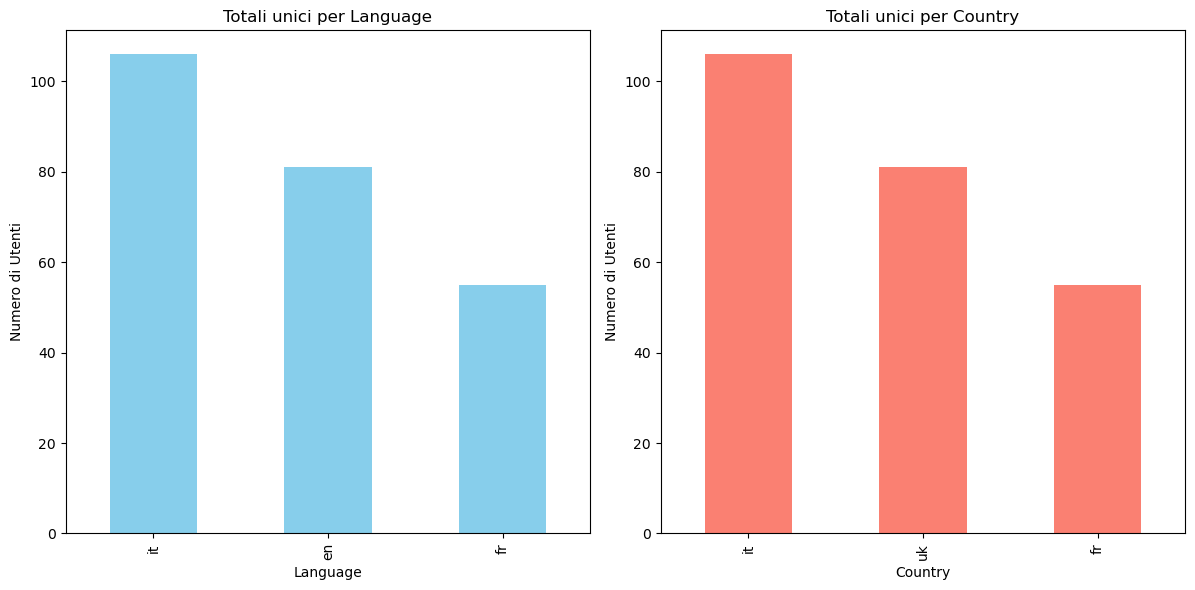

In [55]:
#Utenti univoci

utenti_univoci = dataset.drop_duplicates(subset='user_uuid')

totali_language = utenti_univoci['language'].value_counts()
totali_country = utenti_univoci['country'].value_counts()

#Grafici language, country e platform

plt.figure(figsize=(18, 6))

#Language

plt.subplot(1, 3, 1)
totali_language.plot(kind='bar', color='skyblue')
plt.title('Totali unici per Language')
plt.xlabel('Language')
plt.ylabel('Numero di Utenti')

#Country

plt.subplot(1, 3, 2)
totali_country.plot(kind='bar', color='salmon')
plt.title('Totali unici per Country')
plt.xlabel('Country')
plt.ylabel('Numero di Utenti')

plt.tight_layout()
plt.show()


Text(0, 0.5, 'Numero di Utenti')

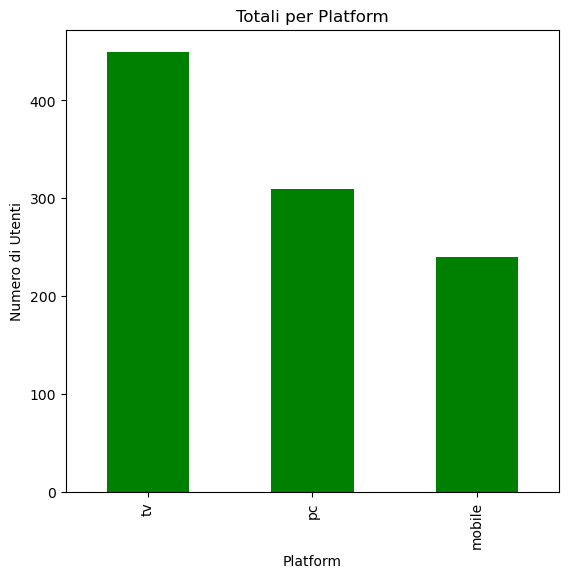

In [53]:
#Utenti per ciascun platform

totali_paltform = dataset['platform'].value_counts()
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
totali_platform.plot(kind='bar', color='green')
plt.title('Totali per Platform')
plt.xlabel('Platform')
plt.ylabel('Numero di Utenti')


#Questo lo calcolo senza unicità user_uuid perchè un utente può collegarsi più volte da piattaforme differenti.


In [60]:
#Piattaforme uniche per ciascun utente

conteggio_piattaforme_per_utente = dataset.groupby('user_uuid')['platform'].nunique()

#Quanti utenti si collegano da più di una piattaforma
utenti_con_piu_piattaforme = (conteggio_piattaforme_per_utente > 1).sum()

print(f"Numero di utenti che si collegano da più di una piattaforma: {utenti_con_piu_piattaforme}")

Numero di utenti che si collegano da più di una piattaforma: 201


In [61]:
#Numero di piattaforme uniche per ciascun utente
conteggio_piattaforme_per_utente = dataset.groupby('user_uuid')['platform'].nunique()

#Percentuali di utenti che si collegano da una, due o tre piattaforme
percentuale_una_piattaforma = (conteggio_piattaforme_per_utente == 1).mean() * 100
percentuale_due_piattaforme = (conteggio_piattaforme_per_utente == 2).mean() * 100
percentuale_tre_piattaforme = (conteggio_piattaforme_per_utente == 3).mean() * 100

print(f"Percentuale di utenti che si collegano da una piattaforma: {percentuale_una_piattaforma:.2f}%")
print(f"Percentuale di utenti che si collegano da due piattaforme: {percentuale_due_piattaforme:.2f}%")
print(f"Percentuale di utenti che si collegano da tre piattaforme: {percentuale_tre_piattaforme:.2f}%")

Percentuale di utenti che si collegano da una piattaforma: 16.94%
Percentuale di utenti che si collegano da due piattaforme: 48.35%
Percentuale di utenti che si collegano da tre piattaforme: 34.71%


In [144]:
#PERSONAS 

#User che fanno cibi "ethnic advanced"
df_ethnic_advanced_users = dataset[(dataset['level'] == 'advanced') & (dataset['category'] == 'ethnic')]

#Lingua più frequente
most_frequent_language_ethnic_advanced = df_ethnic_advanced_users['language'].mode().iloc[0]

#Paese più frequente
most_frequent_country_ethnic_advanced = df_ethnic_advanced_users['country'].mode().iloc[0]

#Piattaforma più frequente
most_frequent_platform_ethnic_advanced = df_ethnic_advanced_users['platform'].mode().iloc[0]

#Media stelle
avg_stars_ethnic_advanced_users = df_ethnic_advanced_users['stars'].mean()


print("Lingua più frequente tra gli user_uuid con cibi 'ethnic advanced':", most_frequent_language_ethnic_advanced)
print("Paese più frequente tra gli user_uuid con cibi 'ethnic advanced':", most_frequent_country_ethnic_advanced)
print("Piattaforma più frequente tra gli user_uuid con cibi 'ethnic advanced':", most_frequent_platform_ethnic_advanced)
print("Media stelle tra gli user_uuid con cibi 'ethnic advanced':", avg_stars_ethnic_advanced_users)


Lingua più frequente tra gli user_uuid con cibi 'ethnic advanced': it
Paese più frequente tra gli user_uuid con cibi 'ethnic advanced': it
Piattaforma più frequente tra gli user_uuid con cibi 'ethnic advanced': tv
Media stelle tra gli user_uuid con cibi 'ethnic advanced': 3.2171052631578947


In [154]:
#PERSONAS TIPICA "BASIC"

#User con livello "basic", categoria "breakfast" o "lunch" e che utilizzano almeno tre piattaforme

df_basic_breakfast_lunch_users = dataset[(dataset['level'] == 'basic') & ((dataset['category'] == 'breakfast') | (dataset['category'] == 'lunch'))]
df_at_least_three_platforms = df_basic_breakfast_lunch_users.groupby('user_uuid')['platform'].nunique() >= 3
df_basic_breakfast_lunch_users = df_basic_breakfast_lunch_users[df_basic_breakfast_lunch_users['user_uuid'].isin(df_at_least_three_platforms[df_at_least_three_platforms].index)]

#Lingua

most_frequent_language_basic = df_basic_breakfast_lunch_users['language'].mode().iloc[0]

#Paese

most_frequent_country_basic = df_basic_breakfast_lunch_users['country'].mode().iloc[0]

#Piattaforma

most_frequent_platform_basic = df_basic_breakfast_lunch_users['platform'].mode().iloc[0]

#Media stelle

avg_stars_basic_users = df_basic_breakfast_lunch_users['stars'].mean()


print("Lingua più frequente:", most_frequent_language_basic)
print("Paese più frequente:", most_frequent_country_basic)
print("Piattaforma più frequente:", most_frequent_platform_basic)
print("Media stelle:", avg_stars_basic_users)


Lingua più frequente: it
Paese più frequente: it
Piattaforma più frequente: mobile
Media stelle: 2.6666666666666665


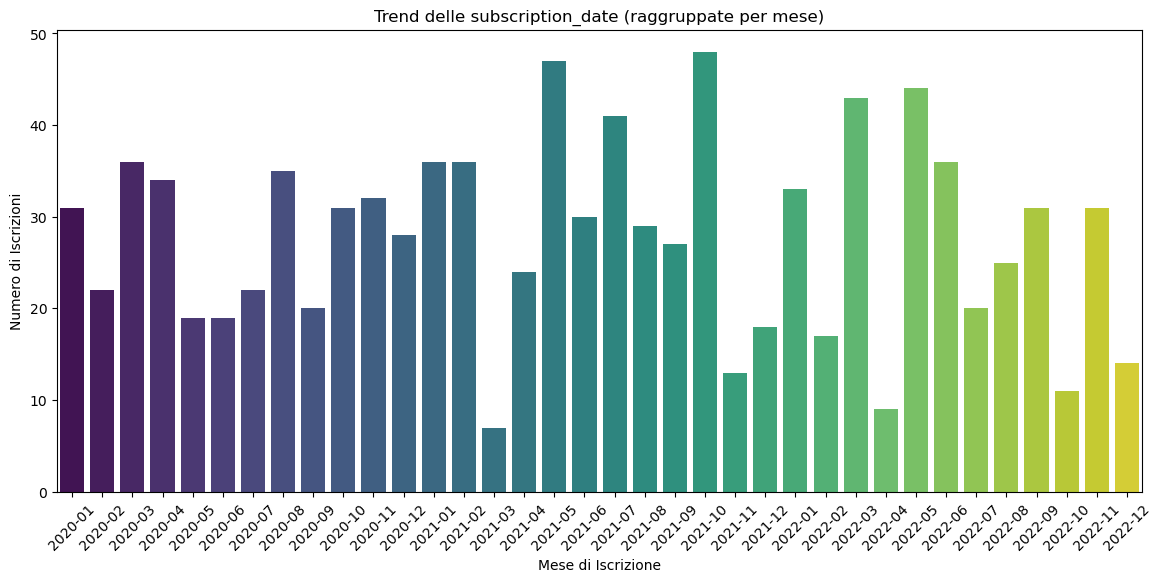

In [70]:
#Converto le colonne di date in formato datetime

dataset['subscription_date'] = pd.to_datetime(dataset['subscription_date'], format='%d-%m-%Y')

#Raggruppo le date per mese

dataset['subscription_month'] = dataset['subscription_date'].dt.to_period('M')

#Subscription/mese

plt.figure(figsize=(14, 6))
sns.countplot(x=dataset['subscription_month'], palette='viridis')
plt.title('Trend delle subscription_date (raggruppate per mese)')
plt.xlabel('Mese di Iscrizione')
plt.ylabel('Numero di Iscrizioni')
plt.xticks(rotation=45)
plt.show()

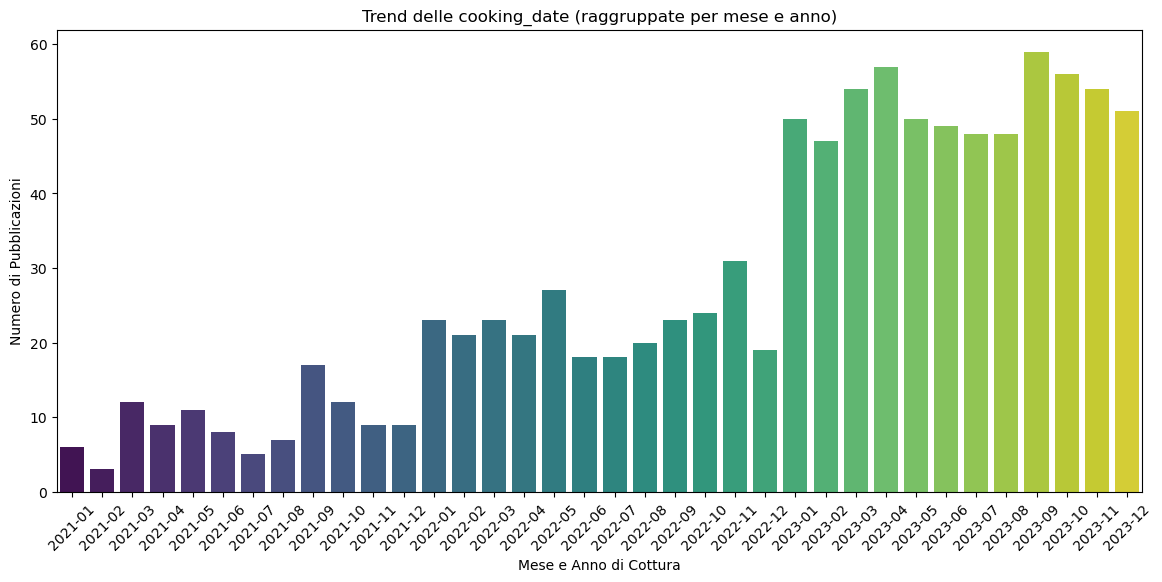

In [76]:
#Converto le colonne di date in formato datetime 

dataset['cooking_date'] = pd.to_datetime(dataset['cooking_date'], format='%d-%m-%Y')

#Raggruppo le date per mese

dataset['cooking_month'] = dataset['cooking_date'].dt.to_period('M')

#Ordino in base a 'cooking_month'

dataset = dataset.sort_values('cooking_month')

#Grafico

plt.figure(figsize=(14, 6))
sns.countplot(x=dataset['cooking_month'], palette='viridis')
plt.title('Trend delle cooking_date (raggruppate per mese e anno)')
plt.xlabel('Mese e Anno di Cottura')
plt.ylabel('Numero di Pubblicazioni')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Vediamo che il trend è positivo più ci avviciniamo al presente

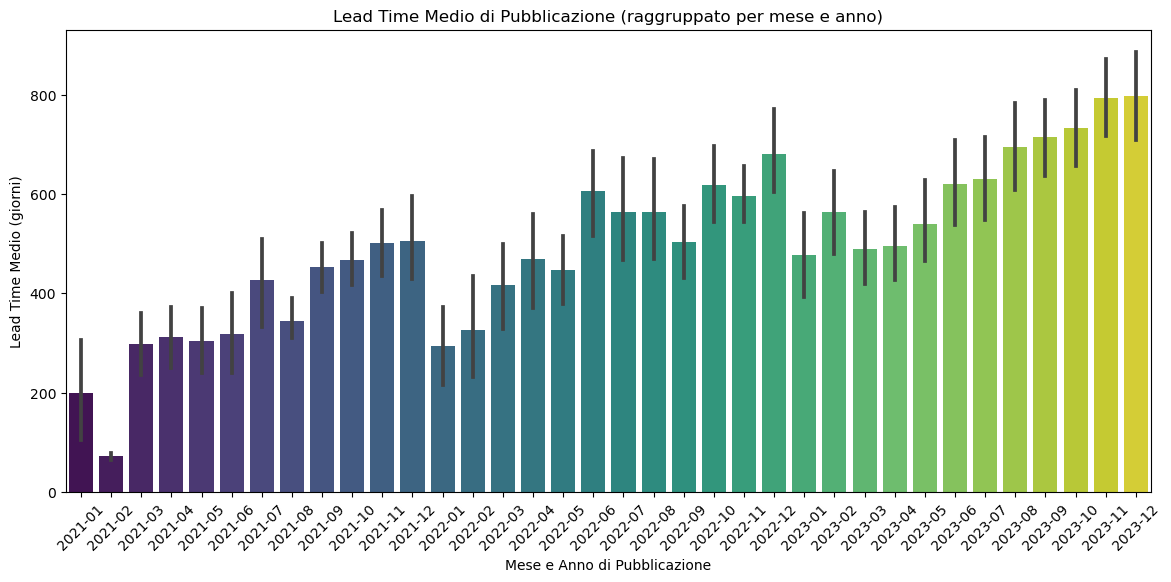

In [77]:
#Differenza tra subscription_date e cooking_date per ciascun utente

dataset['giorni_tra_iscrizione_e_cottura'] = (dataset['cooking_date'] - dataset['subscription_date']).dt.days

#Raggruppo le date per mese/anno
dataset['cooking_month_year'] = dataset['cooking_date'].dt.to_period('M').astype(str)
dataset['anno-mese_cooking_leadtime'] = pd.to_datetime(dataset['cooking_month_year']).dt.to_period('M')
dataset = dataset.sort_values('anno-mese_cooking_leadtime')

#Grafico
plt.figure(figsize=(14, 6))
sns.barplot(x=dataset['anno-mese_cooking_leadtime'], y=dataset['giorni_tra_iscrizione_e_cottura'], palette='viridis')
plt.title('Lead Time Medio di Pubblicazione (raggruppato per mese e anno)')
plt.xlabel('Mese e Anno di Pubblicazione')
plt.ylabel('Lead Time Medio (giorni)')
plt.xticks(rotation=45)
plt.show()

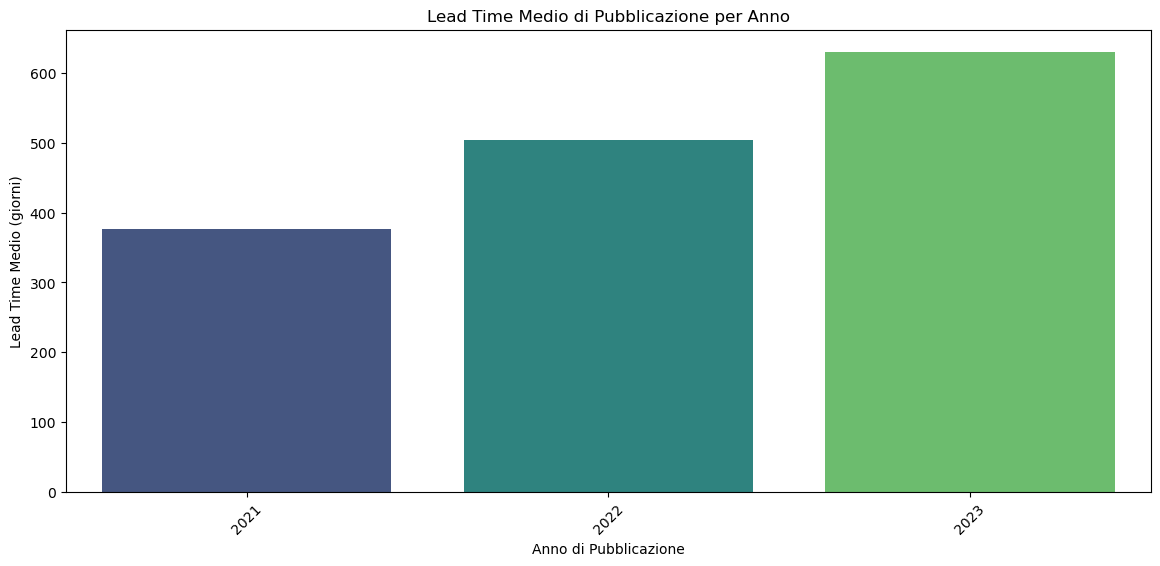

In [94]:
#Differenza in giorni tra subscription_date e cooking_date per ciascun utente

dataset['giorni_tra_iscrizione_e_preparazione'] = (dataset['cooking_date'] - dataset['subscription_date']).dt.days

#Estraggo l'anno da 'cooking_date'

dataset['anno_pubblicazione'] = dataset['cooking_date'].dt.year

#Lead time medio per ogni anno

leadtime_medio_per_anno = dataset.groupby('anno_pubblicazione')['giorni_tra_iscrizione_e_preparazione'].mean()

#Grafico

plt.figure(figsize=(14, 6))
sns.barplot(x=leadtime_medio_per_anno.index, y=leadtime_medio_per_anno.values, palette='viridis')
plt.title('Lead Time Medio di Pubblicazione per Anno')
plt.xlabel('Anno di Pubblicazione')
plt.ylabel('Lead Time Medio (giorni)')
plt.xticks(rotation=45)
plt.show()

In [89]:
#Conteggio delle ricette per livello

conteggio_ricette_perlivello = dataset['level'].value_counts()

#Percentuale rispetto al totale 

percentuale_ricette_perlivello = (conteggio_ricette_perlivello / len(dataset)) * 100

print("Percentuale di Ricette per Livello:")
print(percentuale_ricette_perlivello)


Percentuale di Ricette per Livello:
level
advanced        45.045045
basic           34.834835
intermediate    20.120120
Name: count, dtype: float64


In [97]:
#Challenge_id unici ci sono nel dataset

num_tipi_challenge = dataset['challenge_id'].nunique()
print(f"Numero di tipi di challenge_id unici: {num_tipi_challenge}")

#Percentuale di partecipazione per ciascun tipo di challenge_id
percentuali_partecipazione = dataset['challenge_id'].value_counts(normalize=True) * 100
print("\nPercentuali di partecipazione per ciascun tipo di challenge_id:")
print(percentuali_partecipazione)


Numero di tipi di challenge_id unici: 4

Percentuali di partecipazione per ciascun tipo di challenge_id:
challenge_id
3    27.027027
2    25.325325
1    24.824825
0    22.822823
Name: proportion, dtype: float64


In [102]:
#Raggruppo per challenge_id e calcola la media delle valutazioni per ciascuna tipologia

media_valutazioni_per_tipologia = dataset.groupby('challenge_id')['stars'].mean()
tipologie_selezionate = [0, 1, 2, 3]
media_valutazioni_tipologie_selezionate = media_valutazioni_per_tipologia[tipologie_selezionate]
print("\nMedia delle valutazioni per ciascuna delle 4 tipologie di challenge_id:")
print(media_valutazioni_tipologie_selezionate)




Media delle valutazioni per ciascuna delle 4 tipologie di challenge_id:
challenge_id
0    3.144737
1    2.983871
2    3.256917
3    3.070370
Name: stars, dtype: float64


In [158]:
#Raggruppo il dataset per lingua e trovo la categoria più frequente
grouped_data = dataset.groupby('language').agg({
    'category': lambda x: x.mode().iloc[0],
    'stars': 'mean'
})

print("Risultati per la lingua 'it':")
print("Categoria più frequente:", grouped_data.loc['it', 'category'])
print("Voto medio:", grouped_data.loc['it', 'stars'])

print("\nRisultati per la lingua 'fr':")
print("Categoria più frequente:", grouped_data.loc['fr', 'category'])
print("Voto medio:", grouped_data.loc['fr', 'stars'])

print("\nRisultati per la lingua 'en':")
print("Categoria più frequente:", grouped_data.loc['en', 'category'])
print("Voto medio:", grouped_data.loc['en', 'stars'])


Risultati per la lingua 'it':
Categoria più frequente: ethnic
Voto medio: 3.1179138321995463

Risultati per la lingua 'fr':
Categoria più frequente: ethnic
Voto medio: 3.0727272727272728

Risultati per la lingua 'en':
Categoria più frequente: ethnic
Voto medio: 3.133136094674556


In [161]:
# Filtra il dataset per valutazioni > 3
high_rated_dataset = dataset[dataset['stars'] > 3]

# Raggruppa il nuovo dataset per lingua e calcola le categorie più frequenti e il voto medio
grouped_high_rated_data = high_rated_dataset.groupby('language').agg({
    'category': lambda x: x.mode().iloc[0] if not x.empty else None,
    'stars': 'mean'
})

# Visualizza i risultati
print("Risultati per la lingua 'it':")
print("Categoria più frequente:", grouped_high_rated_data.loc['it', 'category'])
print("Voto medio:", grouped_high_rated_data.loc['it', 'stars'])

print("\nRisultati per la lingua 'fr':")
print("Categoria più frequente:", grouped_high_rated_data.loc['fr', 'category'])
print("Voto medio:", grouped_high_rated_data.loc['fr', 'stars'])

print("\nRisultati per la lingua 'en':")
print("Categoria più frequente:", grouped_high_rated_data.loc['en', 'category'])
print("Voto medio:", grouped_high_rated_data.loc['en', 'stars'])



Risultati per la lingua 'it':
Categoria più frequente: ethnic
Voto medio: 4.541237113402062

Risultati per la lingua 'fr':
Categoria più frequente: ethnic
Voto medio: 4.606741573033708

Risultati per la lingua 'en':
Categoria più frequente: ethnic
Voto medio: 4.52317880794702
